In [1]:
import pandas as pd
import time
import os
import csv

from selenium import webdriver
from selenium.webdriver.common.by import By
# from seleniumFunction import *
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ==================== GLOBAL VARIABLES
# Set Chrome options:
chrome_options = Options()
# chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox') 
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--start-maximized")
chrome_options.add_argument("--disable-application-cache")
chrome_options.add_argument("--disable-cache")
chrome_options.add_argument("--disk-cache-size=0")

In [7]:
# %%capture
# df = pd.read_csv('vietnam_accommodation.csv')
# df.shape

# url = df.url[0]

In [41]:
url = "https://www.agoda.com/vi-vn/pan-pacific-hanoi/hotel/hanoi-vn.html"

In [42]:
driver = webdriver.Chrome(chrome_options)
driver.get(url)

In [37]:
driver.find_elements(By.XPATH, '//*[@id="customer-reviews-panel-tab-5"]')[1].click()

In [40]:
# from bs4 import BeautifulSoup

# # Get the page source
# page_source = driver.page_source

# # Parse the page source with BeautifulSoup
# soup = BeautifulSoup(page_source, 'html.parser')

# # Print or inspect the parsed HTML
# print(soup.prettify())

# # Close the browser
# driver.close()


In [39]:
# Save the parsed HTML to a text file
with open("page_source.txt", "w", encoding="utf-8") as file:
    file.write(soup.prettify())

In [43]:
from bs4 import BeautifulSoup
import pandas as pd

# Load the HTML file
file_path = "page_source.txt"  # Update this with your actual file path
with open(file_path, "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Define the sections to extract
sections = ["overview", "rooms", "facilities", "reviews", "policies"]
data = {section: [] for section in sections}

# Extract data for each section
for section in sections:
    # Find all elements with a class name containing the section name
    section_content = soup.find_all(class_=lambda x: x and section in x.lower())
    # Extract text from each element
    data[section] = [content.get_text(strip=True) for content in section_content]

# Convert the data into a DataFrame
df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in data.items()]))
df
# # Save the DataFrame to a CSV file
# output_path = "output_data.csv"  # Update this to your preferred output file path
# df.to_csv(output_path, index=False)

# print(f"Data extracted and saved to {output_path}")


,overview,rooms,facilities,reviews,policies
0,NaN,Begin typing property name or keyword to searc...,,"8.5Excellent2,558 reviews2,558 reviews",NaN
1,NaN,,,"8.5Excellent2,558 reviews2,558 reviews",NaN
2,NaN,,NaN,"8.5Excellent2,558 reviews2,558 reviews",NaN
3,NaN,NaN,NaN,"""Very good location to move other places for b...",NaN
4,NaN,NaN,NaN,"Rating via Agoda8.5/10ExcellentFrom 1,998 revi...",NaN
5,NaN,NaN,NaN,"Rating via Agoda8.5/10ExcellentFrom 1,998 reviews",NaN
6,NaN,NaN,NaN,Cleanliness score 8.9 out of 10 and is a high ...,NaN
7,NaN,NaN,NaN,Rating9+ Exceptional (387)8-9 Excellent (247)7...,NaN
8,NaN,NaN,NaN,Rating9+ Exceptional (387)8-9 Excellent (247)7...,NaN
9,NaN,NaN,NaN,Rating9+ Exceptional (387)8-9 Excellent (247)7...,NaN


In [49]:
from bs4 import BeautifulSoup
import pandas as pd

# Load the HTML file
file_path = "page_source.txt"  # Update with your file path
with open(file_path, "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Define functions to extract each section
def extract_section(soup, keyword):
    """Extracts content by a keyword related to a specific section."""
    elements = soup.find_all(class_=lambda x: x and keyword in x.lower())
    return [element.get_text(strip=True) for element in elements]

# Extract specific sections
overview = extract_section(soup, "overview")
rooms = extract_section(soup, "rooms")
facilities = extract_section(soup, "facilities")
policies = extract_section(soup, "policies")

overview
# # Combine data into a DataFrame
# data = {
#     "Overview": overview if overview else ["No data"],
#     "Rooms": rooms if rooms else ["No data"],
#     "Facilities": facilities if facilities else ["No data"],
#     "Policies": policies if policies else ["No data"],
# }
# df = pd.DataFrame(data)
# df


[]

In [50]:
# Extract the content with id="property-main-content"
property_main_content = soup.find(id="property-main-content")

# Get all text from the section
if property_main_content:
    content_text = property_main_content.get_text(separator="\n", strip=True)

In [51]:
content_text

"Pan Pacific Hanoi\n5 stars out of 5\n1 Thanh Nien Road, Ba Dinh District, Tay Ho District, Hanoi, Vietnam\n-\nSee map\nExperience the best of Hanoi's Tay Ho District with stunning lakeside views, trendy cafes, and vibrant expat community. Indulge in a luxurious stay at Pan Pacific Hanoi, offering cozy and clean rooms with breathtaking lake vistas. Enjoy the convenience of nearby attractions such as the Night Market, Imperial Citadel of Thang Long, and Dong Xuan Market. Unwind with refreshing cocktails at the bar, take a dip in the warm water pool, and relax in the sauna. Stay connected with complimentary Wi-Fi and enjoy the ultimate comfort with air conditioning and invigorating showers. Discover the perfect blend of convenience and luxury for two travelers at Pan Pacific Hanoi. [Some content may be Generative AI assisted. Inaccuracies may occur.]\nHighlights\n340 meters to Chua Tran Quoc\nCheck-in [24-hour]\nAirport transfer\nGreat Breakfast\nGreat View\nFacilities\nFront desk [24-ho

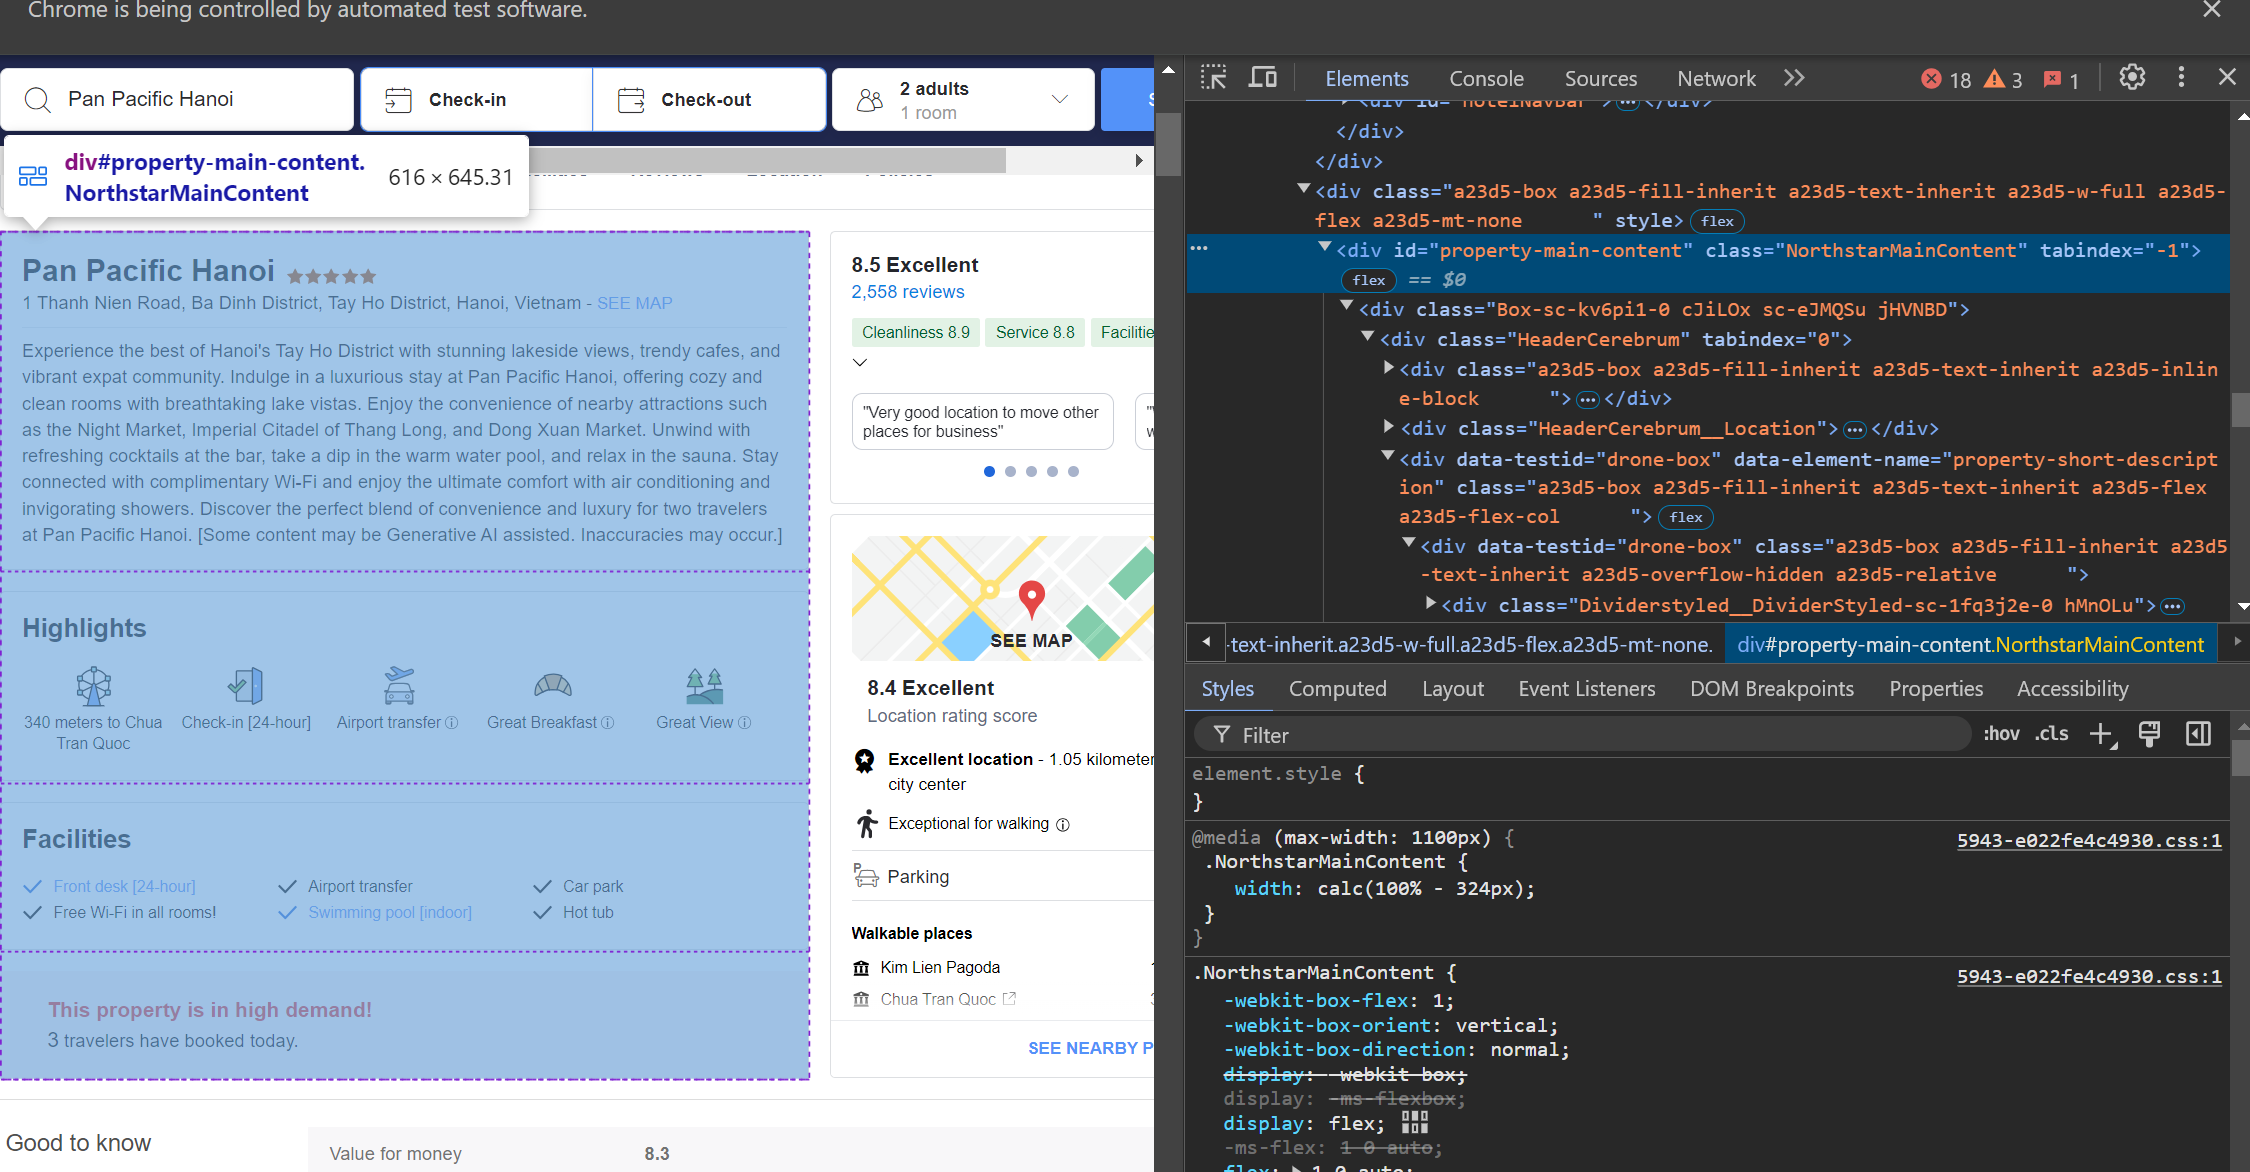

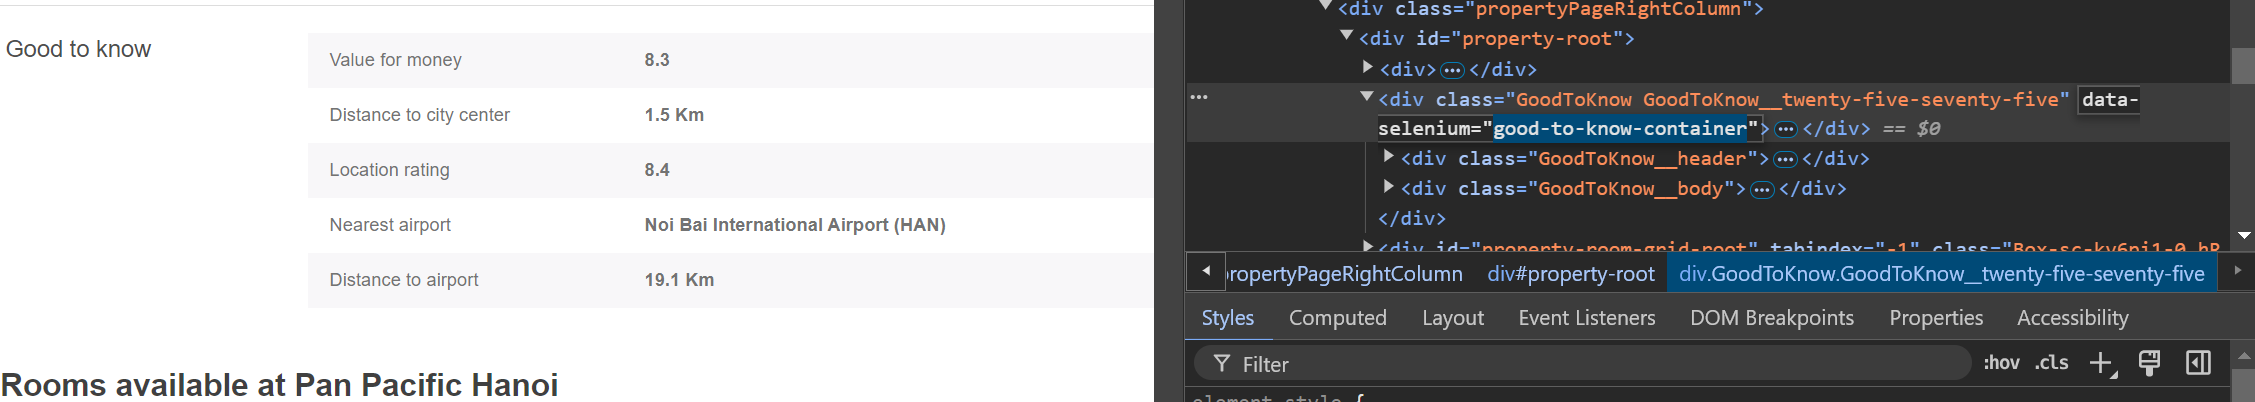

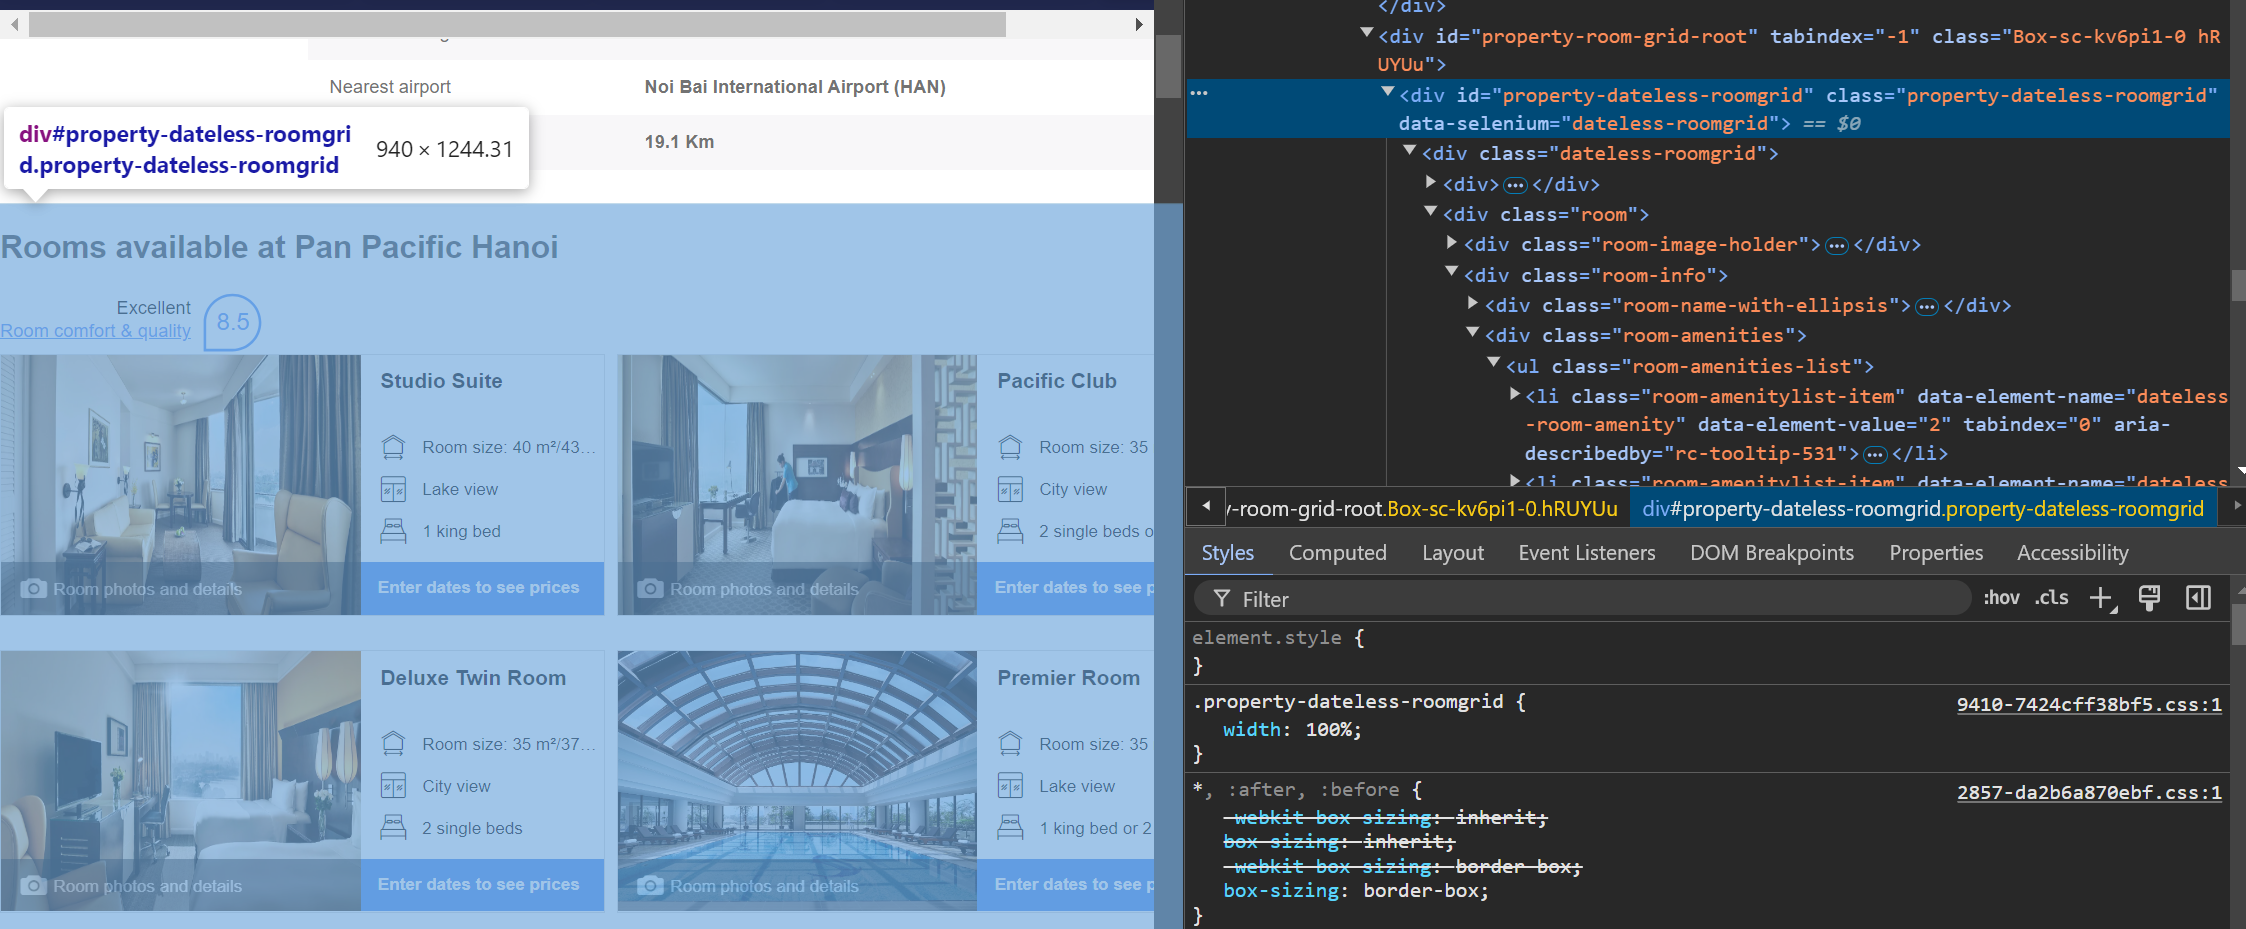

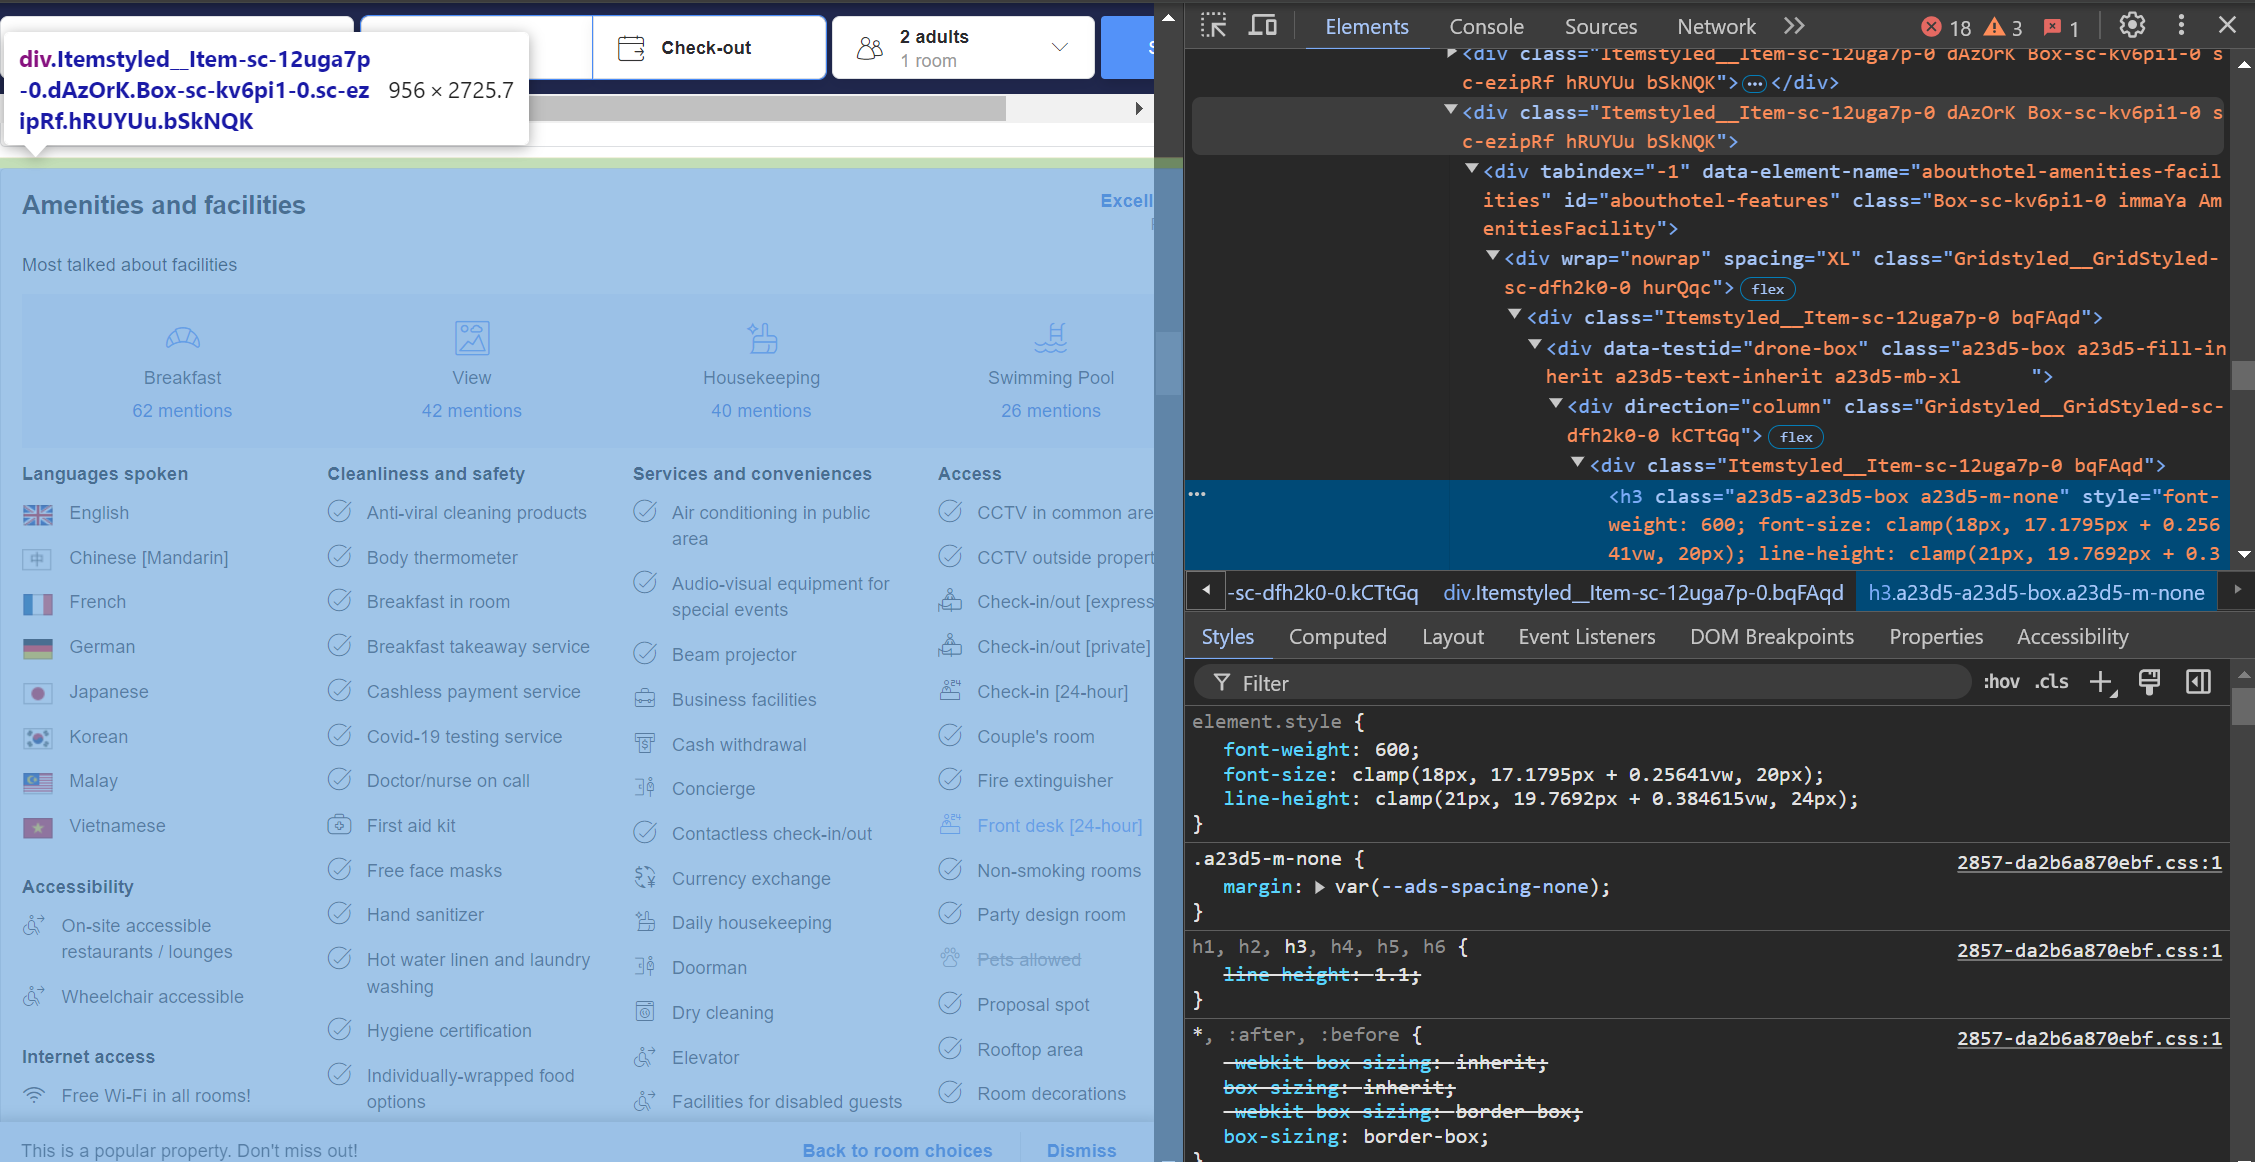

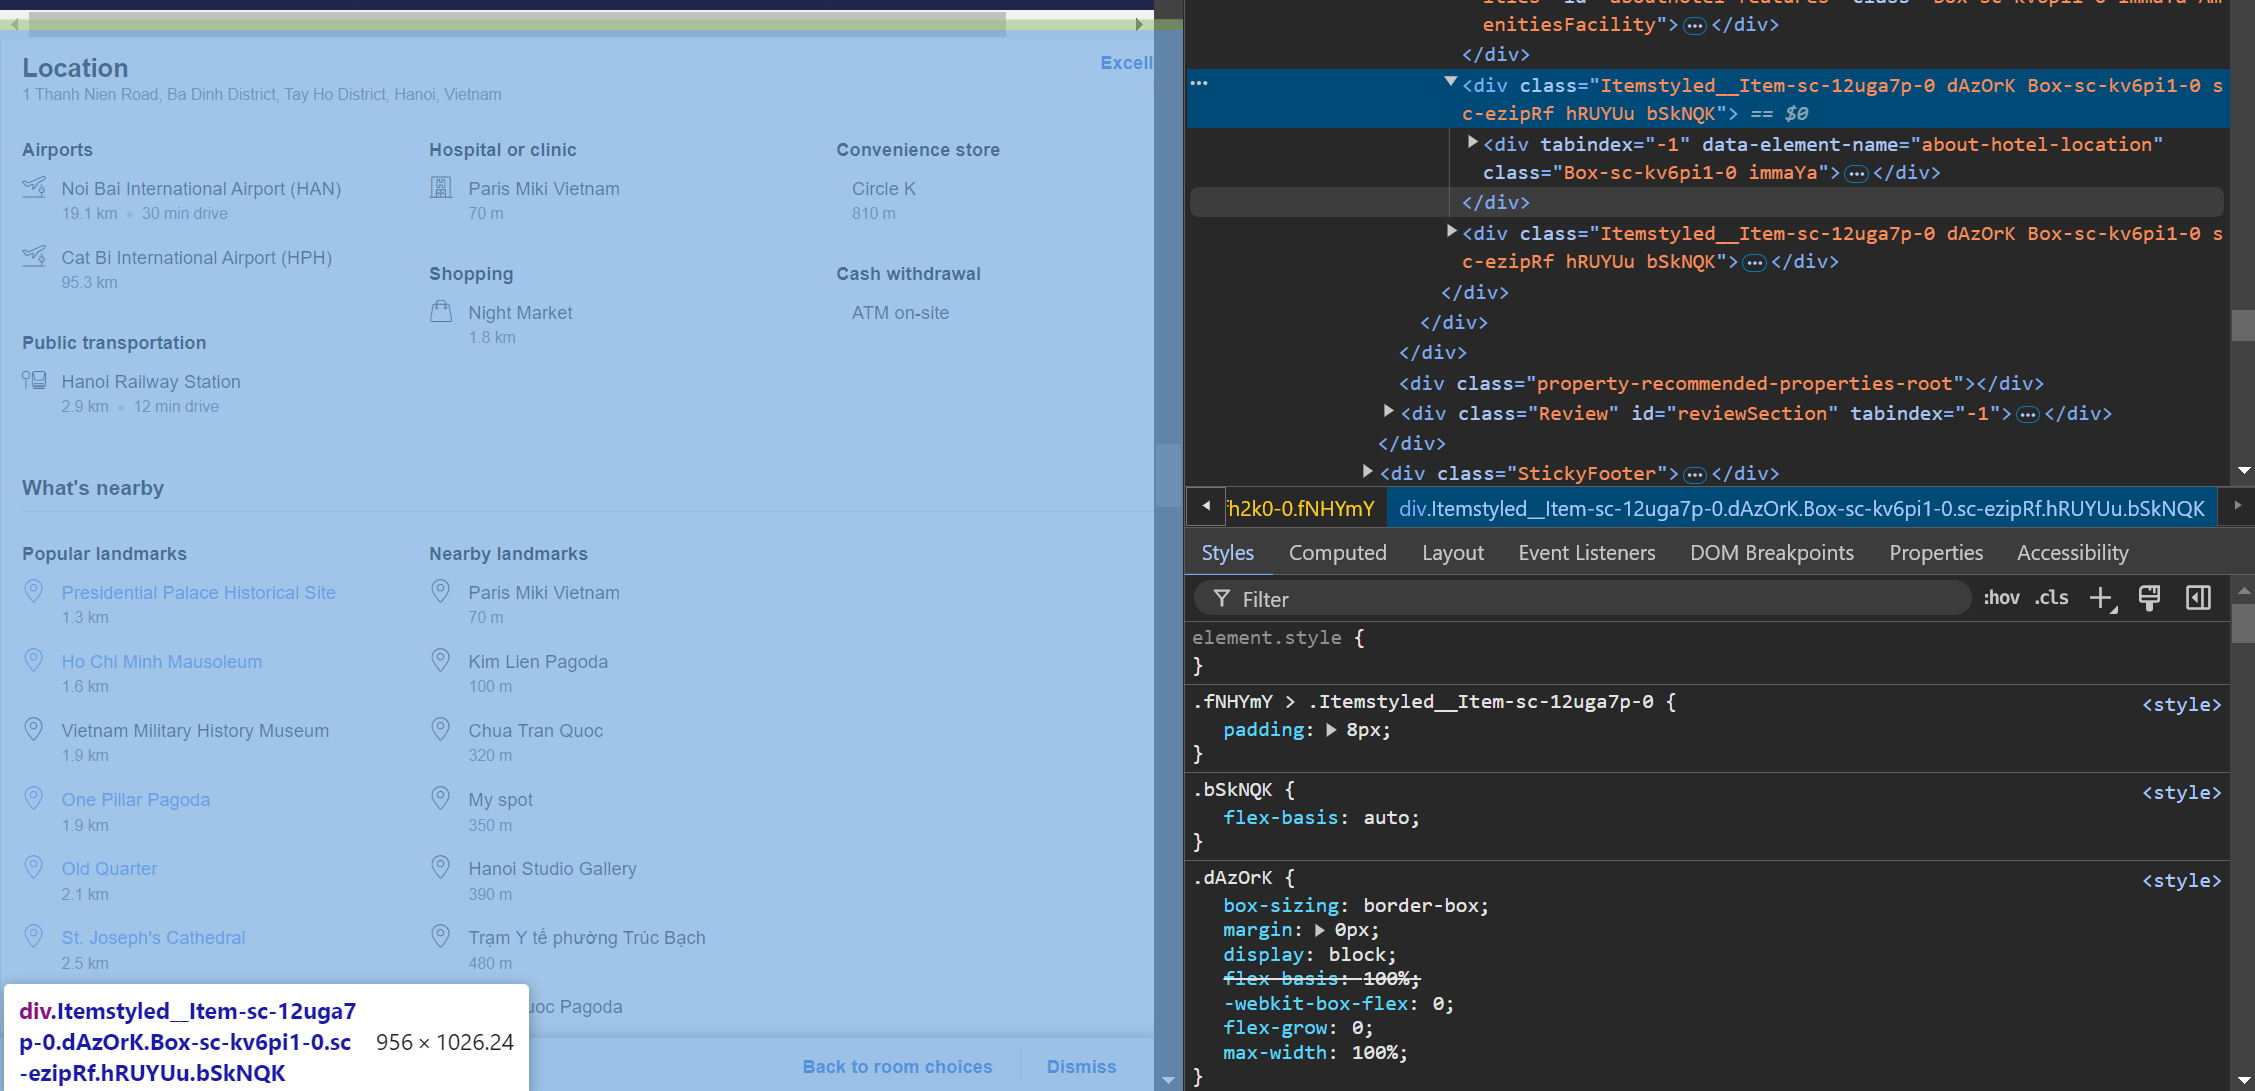

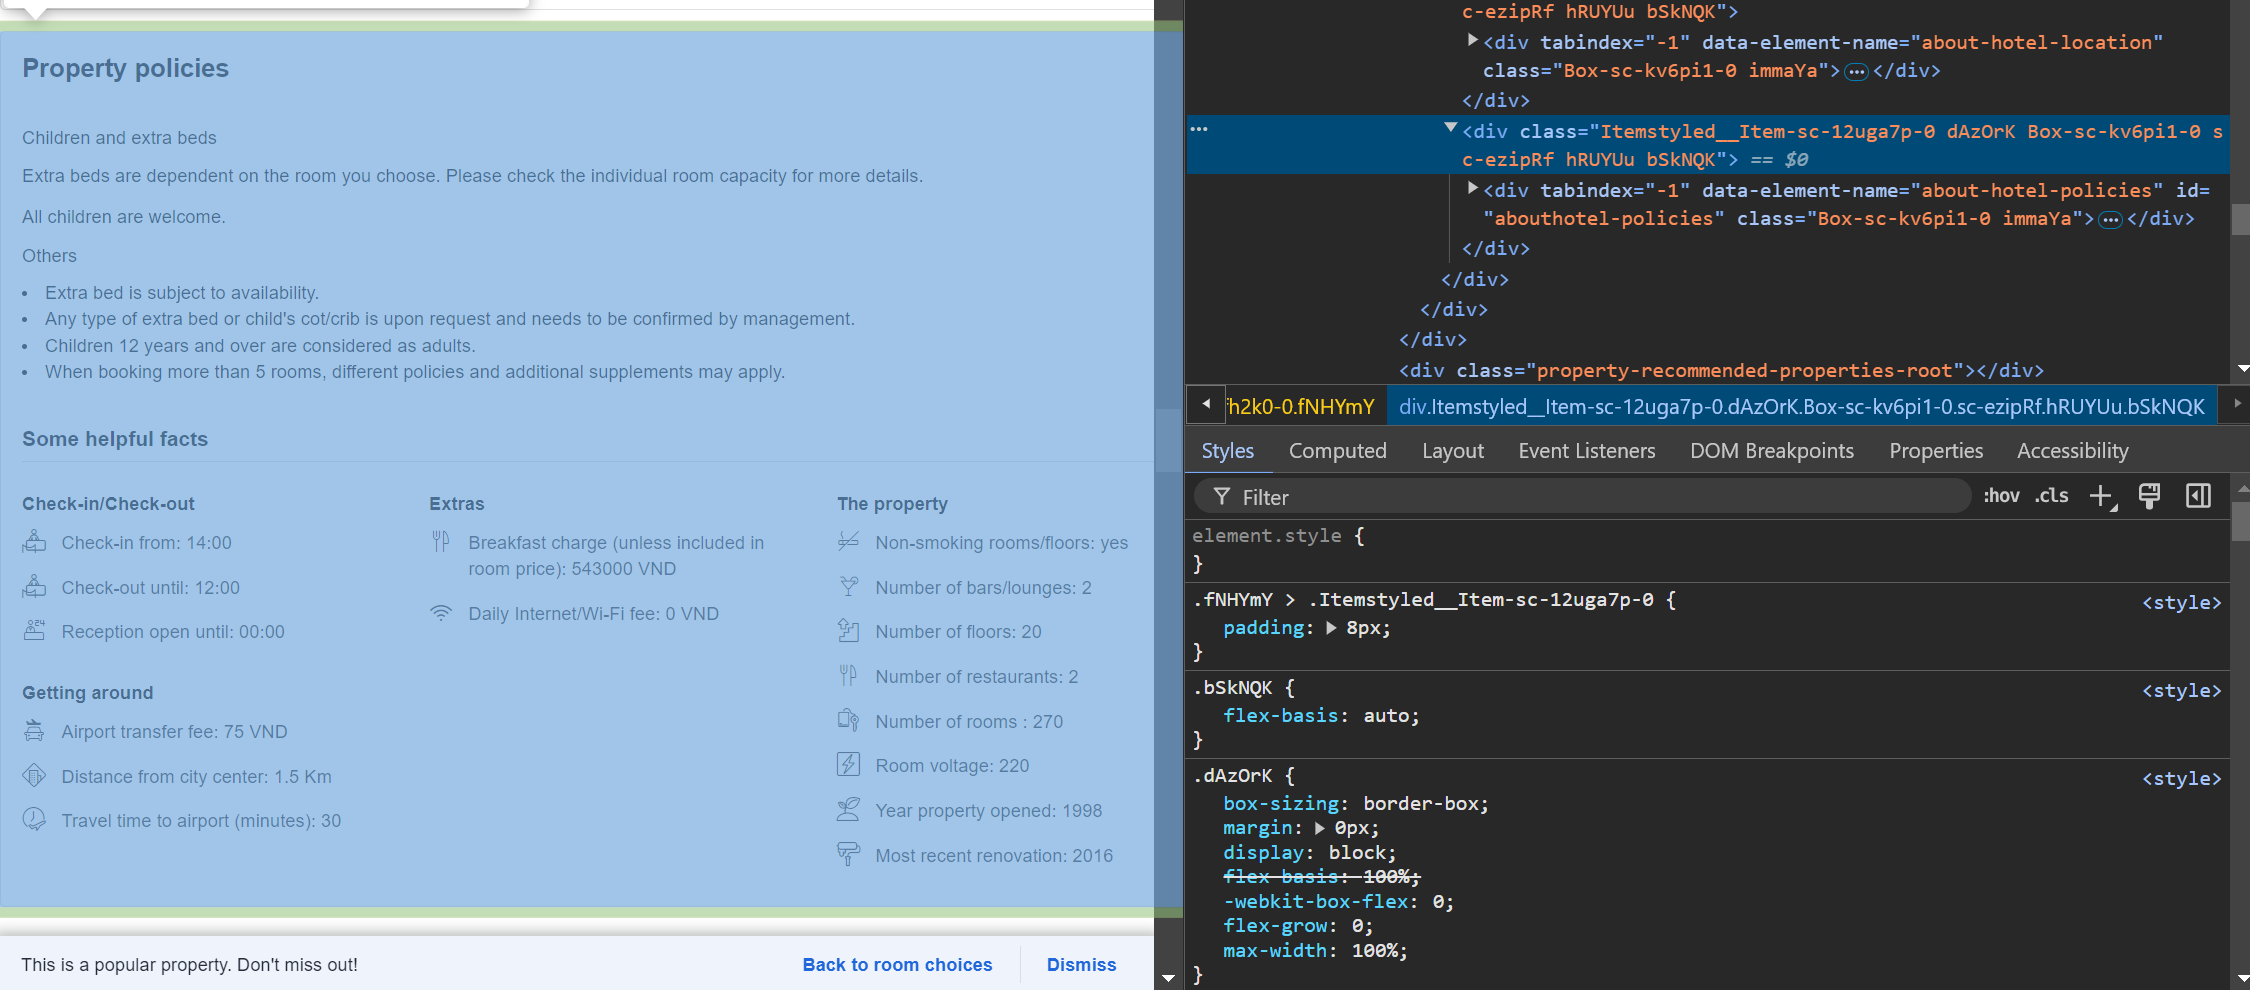

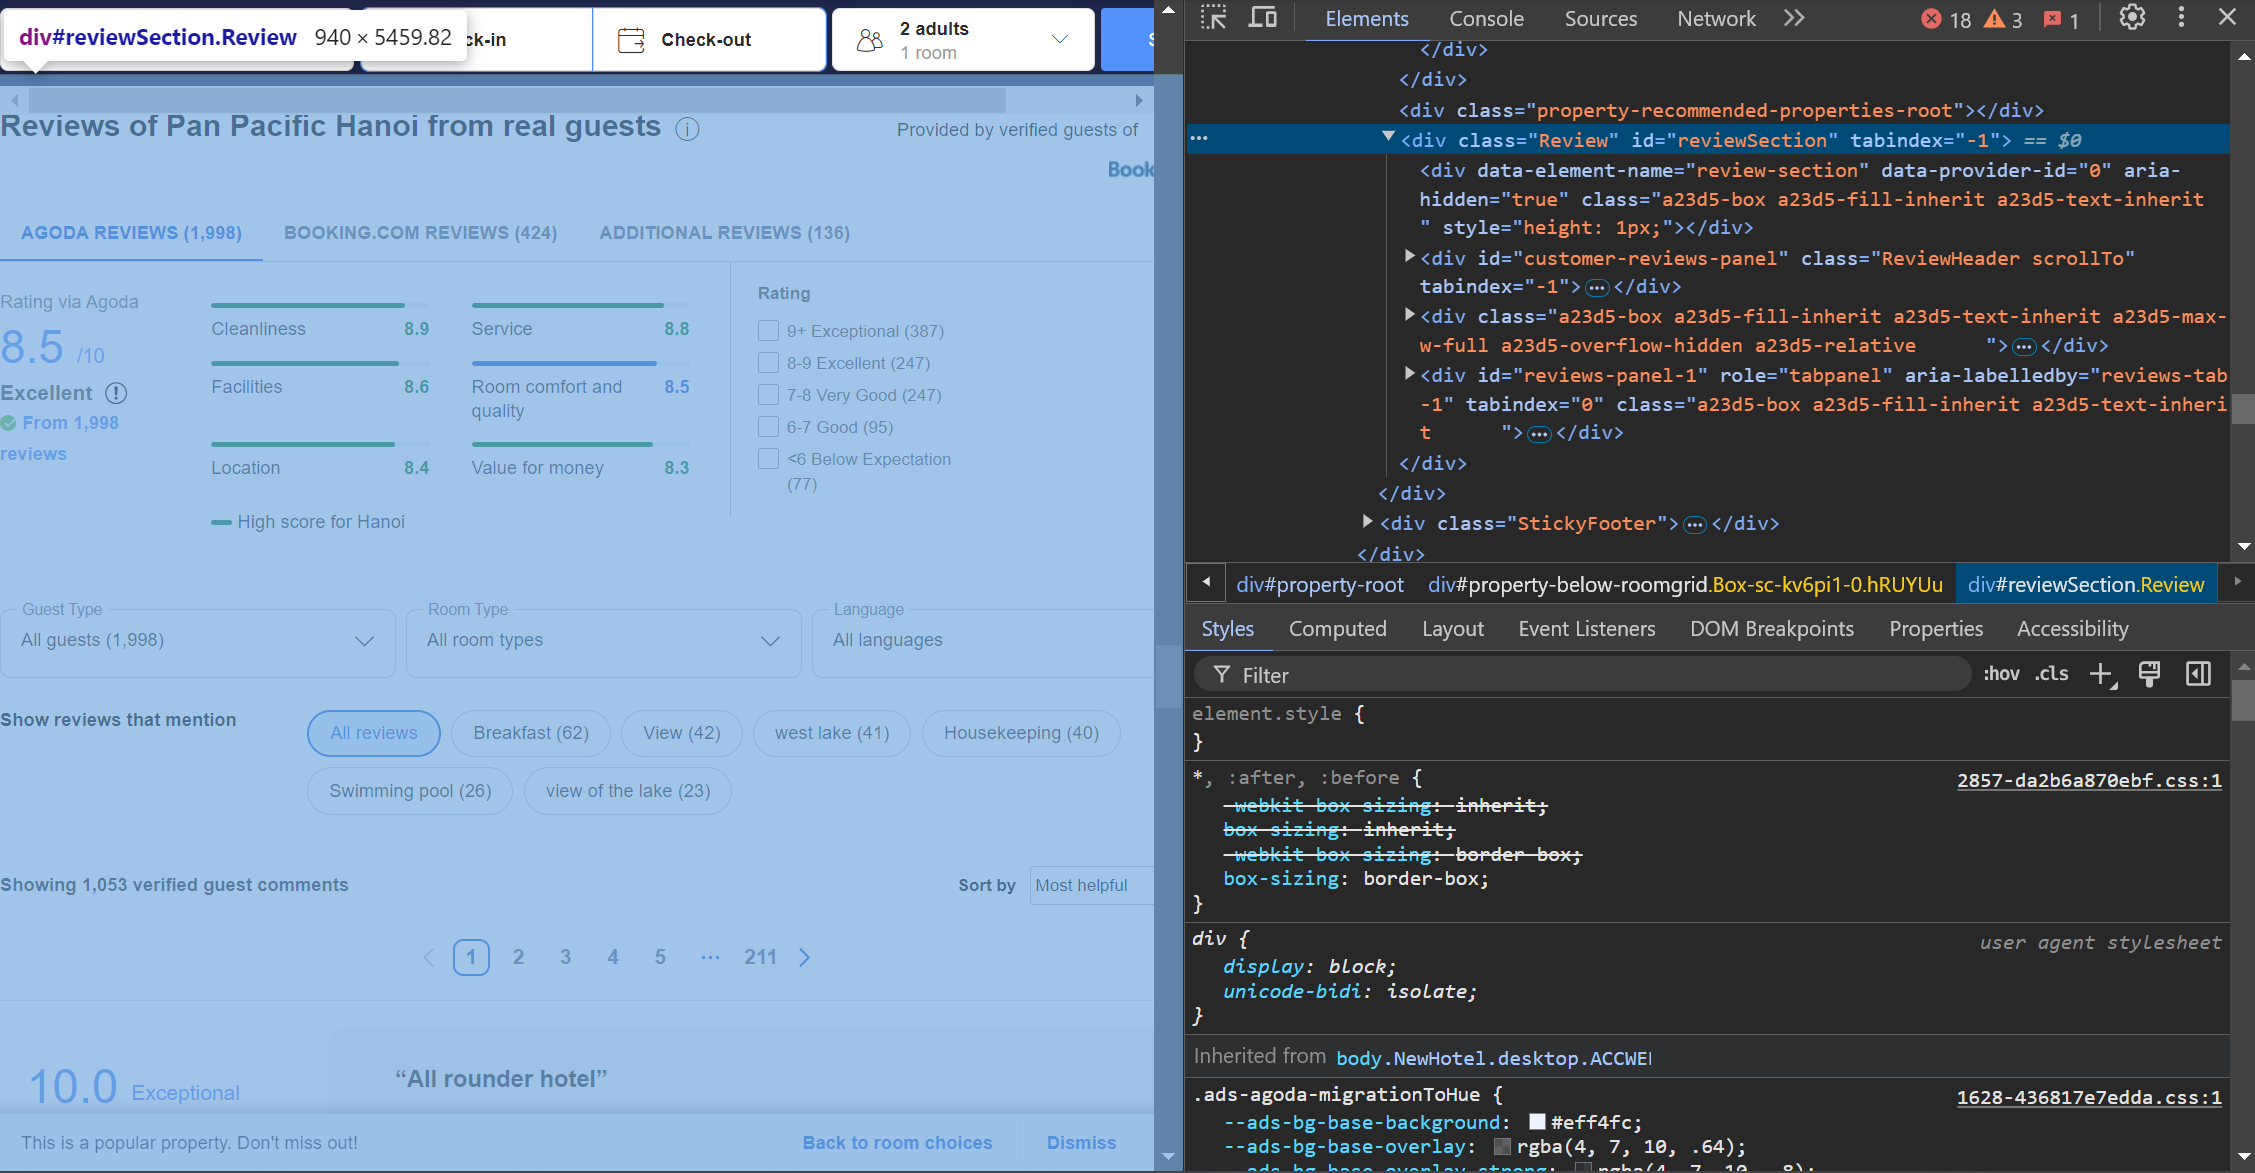

In [59]:
from bs4 import BeautifulSoup

# Example HTML content

# Parse the HTML content
# soup = BeautifulSoup(html_content, "html.parser")

# # Find all elements with class "Box-sc-kv6pi1-0 dtSdUZ"
# elements_dtSdUZ = soup.find_all("div", class_="Box-sc-kv6pi1-0 dtSdUZ")

# Find all elements with class "Box-sc-kv6pi1-0 cTxLvk FeatureGroup"
elements_FeatureGroup = soup.find_all("div", class_="Box-sc-kv6pi1-0 cTxLvk FeatureGroup")

# Print the extracted elements
print("Elements with class 'Box-sc-kv6pi1-0 dtSdUZ':")
for elem in elements_dtSdUZ:
    print(elem.text)

print("\nElements with class 'Box-sc-kv6pi1-0 cTxLvk FeatureGroup':")
# for elem in elements_FeatureGroup:
#     print(elem.text)


Elements with class 'Box-sc-kv6pi1-0 dtSdUZ':
Element 1
Element 3

Elements with class 'Box-sc-kv6pi1-0 cTxLvk FeatureGroup':


In [86]:
# facilities

In [83]:
# elements_FeatureGroup[0].
facilities = elements_FeatureGroup[0]

for each in len(facilities):
    facilities.find_all("div", class_="Box-sc-kv6pi1-0 dtSdUZ")[each].text.replace("\n", " ")


'                   Languages spoken                                                    English                                                              Chinese [Mandarin]                                                              French                                                              German                                                              Japanese                                                              Korean                                                              Malay                                                              Vietnamese                                '

In [94]:
len(facilities)

23

In [98]:
len(facilities.find_all("div", class_="Box-sc-kv6pi1-0 dtSdUZ"))

11

In [147]:
def parse_text_to_dict(raw_text):
    # Step 1: Clean the text by removing excess newlines and spaces
    cleaned_text = raw_text.replace("\n", " ").strip()
    
    # Step 2: Extract the key (first meaningful phrase)
    key_end_index = cleaned_text.find("  ")  # Find double spaces as the delimiter for the key
    if key_end_index != -1:
        key = cleaned_text[:key_end_index].strip().lower()  # Extract the key and convert to lowercase
        content = cleaned_text[key_end_index:].strip()
    else:
        key = cleaned_text.lower()  # Convert the whole text to lowercase if no delimiter
        content = ""

    # Step 3: Parse the content into a list of values
    # Remove multiple spaces and clean the items, then convert to lowercase
    values = [item.strip().lower() for item in content.split("                      ") if item.strip()]

    # Step 4: Return the dictionary
    return {key: values}

columns_name = []
# facilities = elements_FeatureGroup[0]
facilities = elements_FeatureGroup[2].find_all("div", class_="Box-sc-kv6pi1-0 dtSdUZ")

my_dict = {}
for facility in facilities:
    # Update the dictionary with the parsed text and ensure everything is lowercase
    my_dict.update(parse_text_to_dict(facility.text))

# Print the result
my_dict

{'airports': ['noi bai international airport (han)',
  '19.1 km',
  '30 min drive',
  'cat bi international airport (hph)',
  '95.3 km'],
 'public transportation': ['hanoi railway station', '2.9 km', '12 min drive'],
 'hospital or clinic': ['paris miki vietnam', '70 m'],
 'shopping': ['night market', '1.8 km'],
 'convenience store': ['circle k', '810 m'],
 'cash withdrawal': ['atm on-site']}

{'airports': ['noi bai international airport (han)',
  '19.1 km',
  '30 min drive',
  'cat bi international airport (hph)',
  '95.3 km'],
 'public transportation': ['hanoi railway station', '2.9 km', '12 min drive'],
 'hospital or clinic': ['paris miki vietnam', '70 m'],
 'shopping': ['night market', '1.8 km'],
 'convenience store': ['circle k', '810 m'],
 'cash withdrawal': ['atm on-site']}

In [ ]:
def parse_text_to_dict(raw_text):
        # Step 1: Clean the text by removing excess newlines and spaces
        cleaned_text = raw_text.replace("\n", " ").strip()
        
        # Step 2: Extract the key (first meaningful phrase)
        key_end_index = cleaned_text.find("  ")  # Find double spaces as the delimiter for the key
        if key_end_index != -1:
            key = cleaned_text[:key_end_index].strip().lower()  # Extract the key and convert to lowercase
            content = cleaned_text[key_end_index:].strip()
        else:
            key = cleaned_text.lower()  # Convert the whole text to lowercase if no delimiter
            content = ""
    
        # Step 3: Parse the content into a list of values
        # Remove multiple spaces and clean the items, then convert to lowercase
        values = [item.strip().lower() for item in content.split("                      ") if item.strip()]
    
        # Step 4: Return the dictionary
        return {key: values}

crawl_type = [facilities,...,airports] 
for  in 
    columns_name = []
    # facilities = elements_FeatureGroup[0]
    facilities = elements_FeatureGroup[2].find_all("div", class_="Box-sc-kv6pi1-0 dtSdUZ")
    
    my_dict = {}
    for facility in facilities:
        # Update the dictionary with the parsed text and ensure everything is lowercase
        my_dict.update(parse_text_to_dict(facility.text))
    
    # Print the result
    my_dict